In [1]:
import sqlite3 
conn = sqlite3.connect("Chinook_Sqlite.sqlite")
cursor = conn.cursor()

cursor.execute("SELECT InvoiceId, CustomerId FROM Invoice ORDER BY Total DESC LIMIT 15")
rows = cursor.fetchall()

# print(rows)
for row in rows:
    print("Invoice ID: "+str(row[0]) +" Customer ID: "+str(row[1]))

Invoice ID: 404 Customer ID: 6
Invoice ID: 299 Customer ID: 26
Invoice ID: 96 Customer ID: 45
Invoice ID: 194 Customer ID: 46
Invoice ID: 89 Customer ID: 7
Invoice ID: 201 Customer ID: 25
Invoice ID: 88 Customer ID: 57
Invoice ID: 306 Customer ID: 5
Invoice ID: 313 Customer ID: 43
Invoice ID: 103 Customer ID: 24
Invoice ID: 208 Customer ID: 4
Invoice ID: 193 Customer ID: 37
Invoice ID: 5 Customer ID: 23
Invoice ID: 12 Customer ID: 2
Invoice ID: 19 Customer ID: 40


In [16]:
cursor.execute("SELECT Employee.FirstName, Employee.LastName FROM Employee,Customer WHERE Employee.FirstName == Customer.FirstName")
rows = cursor.fetchall()
for row in rows:
    print(row)  


('Steve', 'Johnson')
('Robert', 'King')


In [17]:
cursor.execute("SELECT Employee.FirstName, Employee.LastName FROM Employee,Customer WHERE Employee.LastName == Customer.LastName")
rows = cursor.fetchall()
for row in rows:
    print(row)  

('Michael', 'Mitchell')


In [18]:
cursor.execute("SELECT GenreId, count(*)  as frequency FROM Track group by GenreId order by count(*) desc")
rows = cursor.fetchone()
mostPop = str(rows[0])

query = "SELECT Name FROM Genre where GenreId == "+mostPop

cursor.execute("%s" % (query,))
rows = cursor.fetchone()
for row in rows:
    print(row)   


Rock


In [19]:
cursor.execute("SELECT CustomerId from Customer")
customerId = cursor.fetchall()


count = []
top = []
result = []
for i in customerId:
    
    songs = []
    cursor.execute("SELECT InvoiceId from Invoice WHERE CustomerId == "+str(i[0]))
    invoiceId = cursor.fetchall()

    for j in invoiceId:

        cursor.execute("SELECT TrackId from InvoiceLine WHERE InvoiceId == "+str(j[0]))
        trackId = cursor.fetchall()
        songs.extend(trackId)
    count.append([i[0], len(set(songs))])
for i in count:
    if i[1] == 38:
        top.append(i)
for i in top:
    cursor.execute("SELECT FirstName, LastName FROM Customer WHERE CustomerId == "+str(i[0]))
    customerId = cursor.fetchall()
    result.extend(customerId)

for i in result:
    print(i)

    


('Luís', 'Gonçalves')
('François', 'Tremblay')
('Roberto', 'Almeida')
('Jennifer', 'Peterson')
('Michelle', 'Brooks')
('Tim', 'Goyer')
('Frank', 'Ralston')
('Robert', 'Brown')
('Edward', 'Francis')
('Ellie', 'Sullivan')
('Fynn', 'Zimmermann')
('Niklas', 'Schröder')
('Wyatt', 'Girard')
('Isabelle', 'Mercier')
('Terhi', 'Hämäläinen')
('Ladislav', 'Kovács')
('Hugh', "O'Reilly")
('Emma', 'Jones')
('Phil', 'Hughes')
('Manoj', 'Pareek')
('Bjørn', 'Hansen')
('František', 'Wichterlová')
('Daan', 'Peeters')
('Kara', 'Nielsen')
('Eduardo', 'Martins')
('Fernanda', 'Ramos')
('Frank', 'Harris')
('Dan', 'Miller')
('Heather', 'Leacock')
('John', 'Gordon')
('Richard', 'Cunningham')
('Patrick', 'Gray')
('Aaron', 'Mitchell')
('João', 'Fernandes')
('Madalena', 'Sampaio')
('Camille', 'Bernard')
('Dominique', 'Lefebvre')
('Stanisław', 'Wójcik')
('Mark', 'Taylor')
('Diego', 'Gutiérrez')
('Leonie', 'Köhler')
('Helena', 'Holý')
('Astrid', 'Gruber')
('Alexandre', 'Rocha')
('Mark', 'Philips')
('Jack', 'Smith')


In [20]:
cursor.execute("SELECT ArtistId, count(*)  as frequency FROM Album group by ArtistId order by count(*) desc")
rows = cursor.fetchall()
moreThanFive = []
result = []
for row in rows:
    if row[1] > 5:
        moreThanFive.append(row)
        
for i in range(len(moreThanFive)):        
    cursor.execute("SELECT Name FROM Artist WHERE ArtistId =="+str(moreThanFive[i][0]))
    row = cursor.fetchone()
    temp = (row[0],moreThanFive[i][1]) 
    result.append(temp)

for i in result:
    print(i)


('Iron Maiden', 21)
('Led Zeppelin', 14)
('Deep Purple', 11)
('Metallica', 10)
('U2', 10)
('Ozzy Osbourne', 6)


In [21]:
cursor.execute("SELECT * FROM Artist WHERE Name == 'Iron Maiden'")
rows = cursor.fetchone()
IronMaidenId = rows[0]
cursor.execute("SELECT AlbumId FROM Album WHERE ArtistId == "+str(IronMaidenId))
rows = cursor.fetchall()
GenreIds = []

for i in range(len(rows)):
    cursor.execute("SELECT GenreId FROM Track WHERE AlbumId == "+str(rows[i][0]))
    a = cursor.fetchall()
    GenreIds.extend(a)
GenreNames = []
for i in range (len(GenreIds)):
    cursor.execute("SELECT Name FROM Genre WHERE GenreId =="+str(GenreIds[i][0]))
    a = cursor.fetchall()
    GenreNames.extend(a)

uniqueGenre = set(GenreNames)
for i in(uniqueGenre):
    print("Iron Maiden: "+ str(i[0]))


Iron Maiden: Rock
Iron Maiden: Metal
Iron Maiden: Blues
Iron Maiden: Heavy Metal


In [8]:
cursor.execute("SELECT AlbumId FROM Album")
albums = cursor.fetchall()
playlistsList= []

for i in albums:
    cursor.execute("SELECT TrackId FROM Track WHERE AlbumId =="+ str(i[0]))
    tracks = cursor.fetchall()

    
    temp = []
    albumId = []
    for j in tracks:
        cursor.execute("SELECT PlaylistId FROM PlaylistTrack WHERE TrackId =="+ str(j[0]))
        playlists = cursor.fetchall()

        cursor.execute("SELECT AlbumId FROM Track WHERE TrackId == "+str(j[0]))

        albumId = cursor.fetchone()
        temp.extend(playlists)

    temp2 = [albumId[0]]
    temp2.extend(sorted(set(temp)))
    playlistsList.append(temp2)

moreThanThreePlaylists = []
for i in playlistsList:
    if len(i) > 4:
        cursor.execute("SELECT Title FROM Album WHERE AlbumId == "+str(i[0]))
        albumTitle = cursor.fetchone()
        temp = [albumTitle[0],len(i)-1]
        moreThanThreePlaylists.append(temp)
        
for i in moreThanThreePlaylists:
    print(i)


['Restless and Wild', 4]
['Facelift', 4]
['Prenda Minha', 4]
['Minha Historia', 4]
['Quanta Gente Veio Ver (Live)', 4]
['Black Album', 4]
['Meus Momentos', 4]
['Djavan Ao Vivo - Vol. 02', 4]
['Djavan Ao Vivo - Vol. 1', 4]
['Unplugged', 4]
['Motley Crue Greatest Hits', 4]
['Nevermind', 4]
['Ten', 4]
['Vs.', 4]
['A-Sides', 4]
['Core', 4]
['Temple of the Dog', 4]
['Adorate Deum: Gregorian Chant from the Proper of the Mass', 5]
['Allegri: Miserere', 5]
['Pachelbel: Canon & Gigue', 4]
['Handel: Music for the Royal Fireworks (Original Version 1749)', 5]
['Vivaldi: The Four Seasons', 4]
['Bach: Violin Concertos', 4]
['Bach: Goldberg Variations', 5]
['Bach: The Cello Suites', 5]
['Handel: The Messiah (Highlights)', 5]
['The World of Classical Favourites', 6]
['Sir Neville Marriner: A Celebration', 4]
['Mozart: Wind Concertos', 4]
['Haydn: Symphonies 99 - 104', 4]
['Beethoven: Symhonies Nos. 5 & 6', 5]
['A Soprano Inspired', 5]
['Great Opera Choruses', 5]
['Wagner: Favourite Overtures', 5]
['Fa

In [9]:
conn.close()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

cursor.execute("SELECT ar.ArtistId, ar.Name, al.AlbumId, al.Title, tr.TrackId, tr.Name, tr.GenreId, ge.Name, pl.PlaylistId, pl.Name FROM Artist ar inner join Album al on ar.ArtistId = al.ArtistId inner join Track tr on al.AlbumId = tr.AlbumId inner join Genre ge on tr.GenreId = ge.GenreId inner join PlaylistTrack plt on tr.TrackId = plt.TrackId inner join Playlist pl on plt.PlaylistId = pl.PlaylistId")
a = cursor.fetchall()
df = pd.DataFrame(a,columns =["ar.ArtistId", "ar.Name", "al.AlbumId", "al.Title", "tr.TrackId", "tr.Name", "tr.GenreId", "ge.Name", "pl.PlaylistId", "pl.Name"])

cursor.execute("SELECT ar.Name, tr.Name, ge.Name FROM Artist ar inner join Album al on ar.ArtistId = al.ArtistId inner join Track tr on al.AlbumId = tr.AlbumId inner join Genre ge on tr.GenreId = ge.GenreId")
b = cursor.fetchall()
genreLIST = pd.DataFrame(b,columns =["ar.Name","tr.Name", "ge.Name"])


df

,ar.ArtistId,ar.Name,al.AlbumId,al.Title,tr.TrackId,tr.Name,tr.GenreId,ge.Name,pl.PlaylistId,pl.Name
0,8,Audioslave,271,Revelations,3402,"Band Members Discuss Tracks from ""Revelations""",23,Alternative,1,Music
1,8,Audioslave,271,Revelations,3389,Revelations,23,Alternative,1,Music
2,8,Audioslave,271,Revelations,3390,One and the Same,23,Alternative,1,Music
3,8,Audioslave,271,Revelations,3391,Sound of a Gun,23,Alternative,1,Music
4,8,Audioslave,271,Revelations,3392,Until We Fall,23,Alternative,1,Music
5,8,Audioslave,271,Revelations,3393,Original Fire,23,Alternative,1,Music
6,8,Audioslave,271,Revelations,3394,Broken City,23,Alternative,1,Music
7,8,Audioslave,271,Revelations,3395,Somedays,23,Alternative,1,Music
8,8,Audioslave,271,Revelations,3396,Shape of Things to Come,23,Alternative,1,Music
9,8,Audioslave,271,Revelations,3397,Jewel of the Summertime,23,Alternative,1,Music


In [3]:
cursor.execute("SELECT TrackId FROM Track WHERE AlbumId == 1")
b = cursor.fetchall()
for i in b:
    cursor.execute("SELECT PlaylistId FROM PlaylistTrack WHERE TrackId == "+ str(i[0]))
    b = cursor.fetchall()
    print(b)

    
cursor.execute("SELECT Name FROM Playlist WHERE PlaylistId == 17")
b = cursor.fetchall()
print(b)
# (1,)
# (6,)
# (7,)
# (8,)
# (9,)
# (10,)
# (11,)
# (12,)
# (13,)
# (14,)
# (15,)
# (16,)
# (17,)
# (18,)
# (19,)
# (20,)
# (21,)
# (22,)


[(1,), (8,), (17,)]
[(1,), (8,)]
[(1,), (8,)]
[(1,), (8,)]
[(1,), (8,)]
[(1,), (8,)]
[(1,), (8,)]
[(1,), (8,)]
[(1,), (8,)]
[(1,), (8,)]
[('Heavy Metal Classic',)]


In [12]:
ARTISTS =[]
albumCount = []
trackCount = []
playlistCount = []
artists = sorted(set(df.loc[:,"ar.Name"]))

for i in artists:
    
    temp = df.loc[df['ar.Name'] == i]
    albumNum = len(set(temp.loc[:,"al.AlbumId"]))
    trackNum = len(set(temp.loc[:,"tr.TrackId"]))
    playlistNum = len(set(temp.loc[:,"pl.PlaylistId"]))
    
    if albumNum > 1:
        ARTISTS.append(i)
        trackCount.append(trackNum)
        albumCount.append(albumNum)
        playlistCount.append(playlistNum)

    
genres = list(genreLIST.iloc[:,2])
uniqueGenres = sorted(set(genres))
genreCount = []
for i in uniqueGenres:
    count = genres.count(i)
    genreCount.append((count, i))
genreCount = sorted(genreCount, reverse = True)
topSeven = genreCount[0:7]

topSevenGenres = ["Artist"]

for i in topSeven:
    topSevenGenres.append(i[1])
topSevenGenres

newDF = pd.DataFrame(columns=topSevenGenres)
newDF["Artist"] = ARTISTS
newDF["Num Of Albums"] = albumCount
newDF["Num Of Tracks"] = trackCount
newDF["Num Of Playlists"] = playlistCount

for i in range(len(topSevenGenres)):
    if i == 0:
        continue
    temp = genreLIST.loc[genreLIST['ge.Name'] == topSevenGenres[i]]
# print(temp)
    count = []
    for j in ARTISTS:

        temp2 = temp.loc[genreLIST["ar.Name"] == j]
        count.append(len(temp2.iloc[:,0]))
    newDF[topSevenGenres[i]] = count
originalNewDF = newDF
newDF = newDF.drop(['Artist'], axis=1)
newDF

,Rock,Latin,Metal,Alternative & Punk,Jazz,TV Shows,Blues,Num Of Albums,Num Of Tracks,Num Of Playlists
0,18,0,0,0,0,0,0,2,18,3
1,4,0,0,0,0,0,0,2,4,4
2,0,0,0,0,0,0,0,2,23,2
3,0,17,0,0,14,0,0,2,31,3
4,14,0,0,12,0,0,0,3,40,3
5,0,0,0,0,0,5,0,2,20,2
6,0,0,0,0,0,0,0,3,3,6
7,0,0,18,0,0,0,0,2,18,2
8,0,0,17,0,0,0,0,2,17,3
9,0,21,0,0,0,0,0,2,21,4


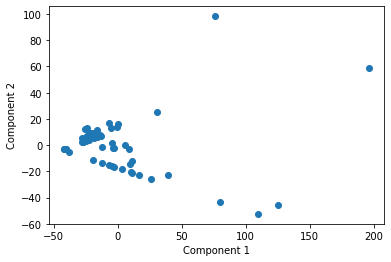

In [13]:
import sklearn
import numpy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import statistics

matrix = newDF.values
newDF_scaled = sklearn.preprocessing.scale(matrix, with_std= False)

pca = PCA(n_components=2)
# pca.fit(newDF_scaled)
newDF_trans = pca.fit_transform(newDF_scaled)
# pca.fit(newDF_trans)

plt.scatter(newDF_trans[:,0],newDF_trans[:,1])
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

[79867.63921568627, 44774.868686868685, 28761.29853479853, 15506.119963369963, 11466.212820512821]


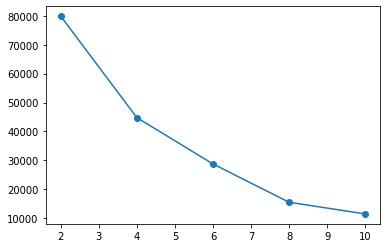

In [17]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



k = [2,4,6,8,10]
inertia = []
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=1)
    result = kmeans.fit(matrix)
    inertia.append(result.inertia_)
    
    y_kmeans = kmeans.predict(matrix)
print(inertia)

plt.plot(k,inertia, marker='o')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=8, random_state=1)
result = kmeans.fit(matrix)
    
y_kmeans = kmeans.predict(matrix)

plt.scatter(newDF_trans[:, 0], newDF_trans[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);



ValueError: could not convert string to float: 'Various Artists'

In [157]:
from scipy.spatial import distance
result = []
unique = sorted(set(y_kmeans))
for i in unique:
    temp = []
    for j in range(len(y_kmeans)):
        if y_kmeans[j] == i:
            temp.append(list(newDF_trans[j]))
    result.append(temp)
# print(centers)

smallest = []
sorting = []
for i in unique:
    center = [centers[i, 0], centers[i, 1]]
#     print(center)
    for j in result[0]:
        d = [distance.euclidean(center, j),j]
        sorting.append(d)
    sorting = sorted(sorting)
    smallest.append([sorting[0][1], sorting[1][1], sorting[2][1]])

print(smallest[0])

[[-4.19255175816389, 1.556559438141938], [-12.289911261654401, -1.6552714072881654], [-14.140897587866775, 7.4438425500329535]]


In [203]:

newDF_trans_LIST = newDF_trans.tolist()
for i in unique:
    print("Cluster "+ str(i)+":")
    for j in range(3):
        index = newDF_trans_LIST.index(smallest[i][j])
        name = originalNewDF.iloc[index,0]
        print(name)
    print("\n")

Cluster 0:
Ozzy Osbourne
Jamiroquai
Miles Davis


Cluster 1:
Ozzy Osbourne
Jamiroquai
Miles Davis


Cluster 2:
Ozzy Osbourne
Ozzy Osbourne
Jamiroquai


Cluster 3:
Ozzy Osbourne
Ozzy Osbourne
Jamiroquai


Cluster 4:
Ozzy Osbourne
Ozzy Osbourne
Jamiroquai


Cluster 5:
Ozzy Osbourne
Ozzy Osbourne
Ozzy Osbourne


Cluster 6:
Ozzy Osbourne
Ozzy Osbourne
Ozzy Osbourne


Cluster 7:
Ozzy Osbourne
Ozzy Osbourne
Ozzy Osbourne


